# Replication of Lab 3: "Analyzing RCT data with Precision Adjustment"

# Group 6

Members:
1. Eljaer Eusebio
2. Claudia Vivas
3. Luis Sandoval
4. Andre Tapia

# QUESTION 1

### MULTICOLINEARITY

We talk about multicollinearity when independent variables of some linear regresion have a high correlation between each one. The results could be biased to the analysis, so the model has a problem. Two cases arise form multicollinearity: Perfect Multicolinearity and Imperfect Multicollinearity. In the first case, it happens when two or more regressors X have a linear and exact relationship between each one , which breaks one of the linear regresion's assumption.

For example: 
We relate food expenditure to family income, which is labor income and labor not-labor income. First one is related with labor supply and salary. In the other case, it is related with income not neccesarily to family (banks transferes, rental income, pensions). Therefore, earned income and unearned income are expected to affect spending. But, if we add total income on the linear regression:

$$
Galim_i = \beta_1 + \beta_2 LaborIncome_i + \beta_3 NotLaborIncome_i + \beta_4 TotalIncome_i + \varepsilon_i
$$

We Know 

$$
 LaborIncome_i + NotLaborIncome_i = TotalIncome_i 
$$

In this case the number of regressors(K) es equal 4, but the range ($X$) is 3. So, the order of matrix $XX'$ is 4x4 but its range in low. In this case, We can't get ${\beta}^~$ because doesn't exist ${XX'}^-1$.

The problem is that "Total income" did not give us more information than "Earnings from work" and "Income from non-work." It is redundant information, so it is necessary to delete it.


About Imperfect Multicollinearity, the relantionship between explanatory variables is strong but not perfectly linear like the first case.

For example:
We wish to explain the relantionship between consume and incomes plus wealth. Following the next model

$$
 Consume_i = \beta_1 + \beta_2 Income_i + \beta_3 Wealth_i + \varepsilon_i
$$

The probability of having high correlation between "Income" and "Wealth" exist. If we focus on high-income households, it is very likely that they have significant accumulated wealth. But the relationship is not perfect because it is possible for someone to have low income but high wealth, and vice versa.

In [2]:
import numpy as np

X = np.random.normal(0, 1, (9, 10))

In [3]:
X

array([[ 0.60178254,  0.07417907, -1.30381169,  0.43553982, -0.02944724,
         0.20287737, -1.0523627 ,  0.11144527,  1.12177364,  0.11119513],
       [ 2.41561051, -0.59898334,  0.72956835,  0.5283627 ,  0.219635  ,
         0.42814997,  1.34840008, -1.61755575,  1.37024043, -1.59921133],
       [-0.65046358, -0.05772355,  0.49734749,  0.61481537, -0.72197613,
        -0.14240669, -0.36233655, -0.40339115,  0.37542233, -0.07535499],
       [-2.022811  , -0.28106206, -0.68524475, -0.71423318,  2.13644056,
        -0.49112554,  0.25442567,  0.68264543,  0.47545337, -1.32425657],
       [-0.80599143,  0.65109799, -1.33227608, -0.52857865,  0.80294719,
         0.81464553, -0.27850313, -1.1576287 ,  0.01017632, -0.8101234 ],
       [-0.82712282,  0.36012403,  0.82601168,  1.73331106, -0.24451321,
         0.35019377,  0.38645061,  0.92142612, -1.04365209,  0.17262741],
       [-0.6807854 ,  0.00817543, -0.09101363, -0.19475345,  0.01641376,
         1.47833321,  1.64967123,  1.85474169

In [4]:
Y = X[6,:]*X[7,:]*X[8,:]

In [5]:
Z = np.vstack((X,Y))

In [6]:
Z = np.asmatrix(Z)

In [7]:
np.shape(Z)

(10, 10)

In [8]:
np.linalg.inv(Z)

matrix([[ 3.89715557e-02,  1.52867758e-01, -1.46185420e-01,
          1.34806326e-02, -1.95652622e-01, -1.70508066e-01,
         -1.67666816e-01,  3.53186501e-01,  3.34851969e-02,
          5.54425507e-01],
        [-4.47651780e-03, -1.00981339e-01,  1.75748467e+00,
          6.04579633e-01, -2.43946408e-01, -1.00234687e+00,
         -1.24482761e+00,  1.69882941e+00,  3.71750418e-01,
          4.98832163e+00],
        [-3.61323414e-01,  1.73190373e-01, -1.63622845e-01,
         -8.82729593e-02, -1.34262168e-01,  1.24406288e-01,
          2.93322078e-01, -1.35519262e-01,  1.18588883e-01,
         -1.16859209e+00],
        [ 3.97164236e-01,  1.95637969e-02, -4.36307863e-01,
         -1.34221143e-01,  1.18477009e-01,  7.38181038e-01,
         -4.08905375e-02, -5.29673894e-01, -5.72843214e-02,
         -6.80579903e-01],
        [ 1.86996463e-01,  3.61436777e-02, -1.81603680e+00,
         -2.91812169e-01,  2.80766990e-01,  9.59384983e-01,
          3.90455654e-01, -1.24056496e+00,  1.926452

According to the documentation of Numpy package, to calculate the generalized inverse of a matrix it is used singular-value decomposition (SVD) method . This optimization method allows inverting no-singular matrixes. In the optimization method lies the difference in the results of this question

# QUESTION 2

##### 1.1. Focus on the Treatment group 2

In [1]:
import pandas as pd
import pyreadr

In [2]:
## loading the data
Penn = pd.read_csv("../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [3]:
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,10845,0,6,6,1,0,0,1,2,0,...,0,0,0,0,0,1,0,0,1,NaN
13901,10705,2,14,14,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN
13906,10558,0,9,9,0,0,0,0,2,0,...,0,0,1,0,0,0,1,0,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN


In [4]:
Penn_1 =Penn[["tg","inuidur1"]]
Penn_1

,tg,inuidur1
0,0,18
1,2,7
3,0,1
4,0,27
9,2,20
...,...,...
13900,0,6
13901,2,14
13906,0,9
13909,2,4


In [5]:
treatment = Penn_1[Penn_1["tg"] == 2]
treatment=treatment[["inuidur1"]]
treatment

,inuidur1
1,7
9,20
21,27
23,3
27,17
...,...
13869,12
13878,3
13881,7
13901,14


In [6]:
control = Penn_1[Penn_1["tg"] == 0]
control = control[["inuidur1"]]
control

,inuidur1
0,18
3,1
4,27
12,27
13,27
...,...
13895,1
13898,23
13900,6
13906,9


##### 1.2. Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [7]:
import seaborn as sns
import numpy as np #Libreria para vectores
import matplotlib.pyplot as plt #Libreria para graficos
import os #Libreria para manejo del SO
%matplotlib inline

In [8]:
sns.set()

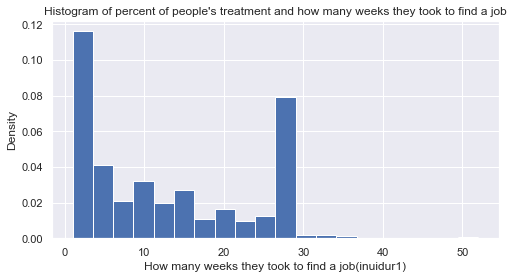

In [9]:
plt.rcParams["figure.figsize"] = (8,4)
plt.hist(x = treatment,bins=20,density=True)
plt.title("Histogram of percent of people's treatment and how many weeks they took to find a job")
plt.xlabel("How many weeks they took to find a job(inuidur1)")
plt.ylabel("Density")
plt.show()

This graphic show us that there were more than 11% of treatment's people whom took only one week to find a job.
Adittionally, there were more than 8% of treatment's people to whom took between 26-28 weeks to find a job.
Therefore, there were very few people (less than 1%) who took between 30 and 40 weeks to find a job.
Finally, everyone else took between 5 and 25 weeks to find a job.

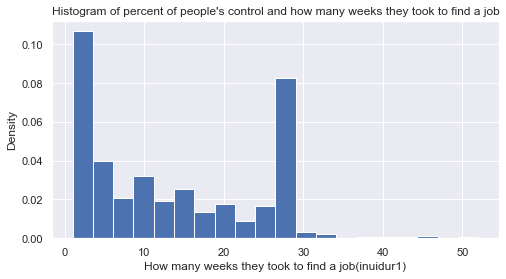

In [10]:
plt.rcParams["figure.figsize"] = (8,4)
plt.hist(x = control,bins=20,density=True)
plt.title("Histogram of percent of people's control and how many weeks they took to find a job")
plt.xlabel("How many weeks they took to find a job(inuidur1)")
plt.ylabel("Density")
plt.show()

This graphic show us that there were more than $10\%$  of control's people whom took only one week to find a job.Adittionally, there were almost $8\%$ of treatment's people to whom took between 26-28 weeks to find a job.Therefore, there were very few people (less than  1% ) who took between 30 and 40 weeks to find a job. Finally, everyone else took between 5 and 25 weeks to find a job.

The distribution of the $inuidur1$ variable is quite similar for the treatment and control groups.  This means that the treatment did not have a differential effect on unemployment, this could be explained by the external influence of the covariates.  

In [11]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [12]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,10845,0,6,6,1,0,0,1,2,0,...,0,0,0,0,1,0,0,1,NaN,0
13901,10705,2,14,14,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,NaN,1
13906,10558,0,9,9,0,0,0,0,2,0,...,0,1,0,0,0,1,0,0,NaN,0
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,NaN,1


In [13]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [2, 0, 1]

##### 1.3. Run all specifications:

###### 1.3.1. classical 2-sample approach, no adjustment (CL)


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [15]:
y = Penn[['T2']].reset_index( drop = True )

In [16]:
result = pyreadr.read_r('../data/m_reg.RData')
X_vars = result['X1']

In [17]:
# model = "T4~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.42e-39
Time:                        14:53:54   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Users\edfra\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  warnings.warn('covariance of constraints does not have full '


##### 1.3.2. classical linear regression adjustment (CRA)


In [18]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# formula_cra = 'log_inuidur1 ~ T4 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

#getting data
# Get data from R
result = pyreadr.read_r('../data/ols_cra_reg.RData')
X_vars = result['X1']

ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0154
Time:                        14:53:54   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

C:\Users\edfra\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


##### 1.3.3. interactive regression adjustment (IRA)

In [19]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [20]:
# Reset index to estimation
# Get data from R
result = pyreadr.read_r('../data/ols_ira_reg.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

C:\Users\edfra\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:53:54   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

##### 1.3.4. interactive regression adjustment (IRA) using Lasso. I already fixed the problems in the Python code so please check again the Python script for the solution. For this now I used another package called hdmpy, you can see how to install it in this link. If you don´t want to use this package (which will give you the exact results as it is in R) just use the lasso from scikit-learn.

In [21]:
import hdmpy

In [22]:
# Get data from R
result = pyreadr.read_r('../data/rlasso_ira_reg.RData')
X_vars = result['S']

In [23]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074573,0.032104,-2.322847,0.020187


In [24]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2
table2.to_latex
print(table2.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      \$CL\$ &     \$CRA\$ &     \$IRA\$ &  \$IRA Lasso\$ \\
\midrule
estimate       & -0.078825 & -0.071207 & -0.069904 &    -0.074573 \\
standard error &  0.032509 &  0.032044 &  0.032076 &     0.032104 \\
\bottomrule
\end{tabular}



Treatment group 2 experiences an average decrease of about $7.1\%$ in the length of unemployment spell.


Observe that classical linear regression adjustment (CRA) delivers estimates that are slighly more efficient (lower standard errors) than the others estimations, but essentially all methods have very similar standard errors.

We also see the interactive regression adjustment (IRA) estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct. However, if we need to choose one model, we would prefer IRA with the Lasso model because this keeps the covariables of interest to the researcher

#### 2. Using interactive regression adjustment (IRA) plot the coefficients of the next variables
- T2*female
- T2*black
- T2*agelt35
- T2*factor(dep)1
- Please comment this figure and try to give an explanation for the coefficients.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
coef_df = pd.DataFrame(ols_ira.summary().tables[1].data)
coef_df.head(40)

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,(Intercept),2.0557,0.021,99.243,0.000,2.015,2.096
2,T2TRUE,-0.0699,0.032,-2.179,0.029,-0.133,-0.007
3,Xfemale,-0.6663,0.408,-1.633,0.103,-1.466,0.134
4,Xblack,-0.8635,0.297,-2.908,0.004,-1.446,-0.281
5,Xothrace,-3.8177,0.937,-4.076,0.000,-5.654,-1.982
6,Xfactor(dep)1,0.0359,0.648,0.055,0.956,-1.234,1.306
7,Xfactor(dep)2,0.2118,0.451,0.469,0.639,-0.673,1.096
8,Xq2,-0.2546,0.455,-0.559,0.576,-1.147,0.638
9,Xq3,-0.6212,0.455,-1.365,0.172,-1.513,0.271


In [27]:
coef_df.columns = coef_df.iloc[0]
coef_df.columns

Index(['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'], dtype='object', name=0)

In [28]:
coef_df=coef_df.drop(0)
coef_df.head(45)

,,coef,std err,t,P>|t|,[0.025,0.975]
1,(Intercept),2.0557,0.021,99.243,0.000,2.015,2.096
2,T2TRUE,-0.0699,0.032,-2.179,0.029,-0.133,-0.007
3,Xfemale,-0.6663,0.408,-1.633,0.103,-1.466,0.134
4,Xblack,-0.8635,0.297,-2.908,0.004,-1.446,-0.281
5,Xothrace,-3.8177,0.937,-4.076,0.000,-5.654,-1.982
6,Xfactor(dep)1,0.0359,0.648,0.055,0.956,-1.234,1.306
7,Xfactor(dep)2,0.2118,0.451,0.469,0.639,-0.673,1.096
8,Xq2,-0.2546,0.455,-0.559,0.576,-1.147,0.638
9,Xq3,-0.6212,0.455,-1.365,0.172,-1.513,0.271
10,Xq4,-0.4799,0.456,-1.052,0.293,-1.374,0.414


In [29]:
coef_df = coef_df.set_index(coef_df.columns[0])
coef_df

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
(Intercept),2.0557,0.021,99.243,0.000,2.015,2.096
T2TRUE,-0.0699,0.032,-2.179,0.029,-0.133,-0.007
Xfemale,-0.6663,0.408,-1.633,0.103,-1.466,0.134
Xblack,-0.8635,0.297,-2.908,0.004,-1.446,-0.281
Xothrace,-3.8177,0.937,-4.076,0.000,-5.654,-1.982
...,...,...,...,...,...,...
T2TRUE:Xagegt54:durable,0.1732,0.318,0.545,0.586,-0.450,0.796
T2TRUE:Xagegt54:lusd,-0.1245,0.267,-0.467,0.641,-0.647,0.398
T2TRUE:Xagegt54:husd,0.2899,0.296,0.979,0.328,-0.291,0.870


In [30]:
coef_df = coef_df.astype(float)

In [31]:
variables = list(coef_df.index.values)
variables

['(Intercept)',
 'T2TRUE',
 'Xfemale',
 'Xblack',
 'Xothrace',
 'Xfactor(dep)1',
 'Xfactor(dep)2',
 'Xq2',
 'Xq3',
 'Xq4',
 'Xq5',
 'Xq6',
 'Xagelt35',
 'Xagegt54',
 'Xdurable',
 'Xlusd',
 'Xhusd',
 'Xfemale:black',
 'Xfemale:othrace',
 'Xfemale:factor(dep)1',
 'Xfemale:factor(dep)2',
 'Xfemale:q2',
 'Xfemale:q3',
 'Xfemale:q4',
 'Xfemale:q5',
 'Xfemale:q6',
 'Xfemale:agelt35',
 'Xfemale:agegt54',
 'Xfemale:durable',
 'Xfemale:lusd',
 'Xfemale:husd',
 'Xblack:factor(dep)1',
 'Xblack:factor(dep)2',
 'Xblack:q2',
 'Xblack:q3',
 'Xblack:q4',
 'Xblack:q5',
 'Xblack:agelt35',
 'Xblack:agegt54',
 'Xblack:durable',
 'Xblack:lusd',
 'Xblack:husd',
 'Xothrace:factor(dep)1',
 'Xothrace:factor(dep)2',
 'Xothrace:q2',
 'Xothrace:q3',
 'Xothrace:q4',
 'Xothrace:q5',
 'Xothrace:agelt35',
 'Xothrace:agegt54',
 'Xothrace:durable',
 'Xothrace:lusd',
 'Xothrace:husd',
 'Xfactor(dep)1:q2',
 'Xfactor(dep)2:q2',
 'Xfactor(dep)1:q3',
 'Xfactor(dep)2:q3',
 'Xfactor(dep)1:q4',
 'Xfactor(dep)2:q4',
 'Xfactor(d

In [32]:
coef_df['variables'] = variables
coef_df

,coef,std err,t,P>|t|,[0.025,0.975],variables
,,,,,,,
(Intercept),2.0557,0.021,99.243,0.000,2.015,2.096,(Intercept)
T2TRUE,-0.0699,0.032,-2.179,0.029,-0.133,-0.007,T2TRUE
Xfemale,-0.6663,0.408,-1.633,0.103,-1.466,0.134,Xfemale
Xblack,-0.8635,0.297,-2.908,0.004,-1.446,-0.281,Xblack
Xothrace,-3.8177,0.937,-4.076,0.000,-5.654,-1.982,Xothrace
...,...,...,...,...,...,...,...
T2TRUE:Xagegt54:durable,0.1732,0.318,0.545,0.586,-0.450,0.796,T2TRUE:Xagegt54:durable
T2TRUE:Xagegt54:lusd,-0.1245,0.267,-0.467,0.641,-0.647,0.398,T2TRUE:Xagegt54:lusd
T2TRUE:Xagegt54:husd,0.2899,0.296,0.979,0.328,-0.291,0.870,T2TRUE:Xagegt54:husd


In [33]:
coef_df = coef_df[(coef_df['variables'] == "T2TRUE:Xfemale") | (coef_df['variables'] == "T2TRUE:Xblack") | (coef_df['variables'] == "T2TRUE:Xfactor(dep)1") |    (coef_df['variables'] == "T2TRUE:Xagelt35")]

In [34]:
coef_df

,coef,std err,t,P>|t|,[0.025,0.975],variables
,,,,,,,
T2TRUE:Xfemale,-0.6598,0.550,-1.200,0.230,-1.738,0.418,T2TRUE:Xfemale
T2TRUE:Xblack,0.4526,0.510,0.887,0.375,-0.548,1.453,T2TRUE:Xblack
T2TRUE:Xfactor(dep)1,0.7636,0.785,0.972,0.331,-0.776,2.303,T2TRUE:Xfactor(dep)1
T2TRUE:Xagelt35,1.1233,0.637,1.762,0.078,-0.126,2.373,T2TRUE:Xagelt35


In [35]:
errors = coef_df['coef'] - coef_df['[0.025']

In [36]:
coef_df['errors'] = errors

<ipython-input-36-ed9be35b4c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['errors'] = errors


<ipython-input-37-2521eb0ca58a>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


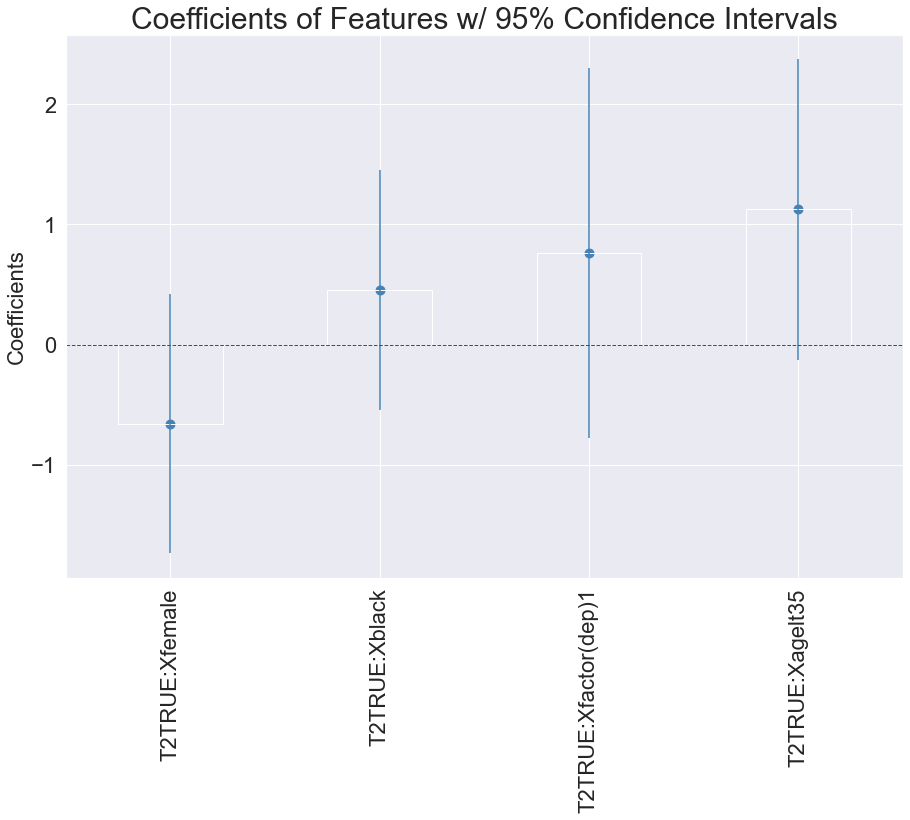

In [37]:
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15, 10))
    
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='coef', kind='bar',
            ax=ax, color='none', fontsize=22, 
            ecolor='steelblue',capsize=0,
            yerr='errors', legend=False)
    
# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)
    
# Coefficients
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
         marker='o', s=80, 
         y=coef_df['coef'], color='steelblue')
    
# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()

##### This graphic shows four interactive coefficients ($T2TRUE:Xfemale$, $T2TRUE:Xblack$, $T2TRUE:Xfactor(dep)1$, $T2TRUE:Xagelt35$) of the second treated group with $95%$ confidence intervals. These are the following inferences:

- First of all, the $T2TRUE:Xfemale$ coefficient of the second treated group, says that woman is $65.9\%$ less likely to be unemployed for one more week compared to a man. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. 

- Secondly, the $T2TRUE:Xblack$ coefficient of the second treated group, says that an African American person is $45.26\%$ more likely to be unemployed for one more week compared to a white person. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. 

- Thirdly, the $T2TRUE:Xfactor(dep)1$ coefficient of the second treated group, a person with only one dependent is $76.36\%$ more likely to be unemployed for one more week compared to a person with two or more dependents. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. 

- Finally, the $T2TRUE:Xagelt35$ coefficient of the second treated group, a person who is younger than 35 years of age is $112\%$ more likely to be unemployed for one more week compared to a person older than 35 years. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. In few words, all these coefficiences are no significative